In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Arthur: (Alex) Xi Zeng, 1007099373
Collaborator: Marko, Angel, Zed, Karen

# Q1: A Discrete Convolution Program (5 pts)

Write a discrete convolution function `myConv` that convolves two arrays {$f_i, i = 0, \dots , N_f-1$}
and {$w_j, j = 0, \dots , N_w-1$} to obtain an output time series {$g_n$}. For simplicity, assume a fixed sampling interval $\Delta = 1$, and further, that $f$ and $w$ are $0$ outside of their sampled regions. 

 1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer. 
 2. Please copy and paste your function `g = myConv(f, w)` to the PDF report.
 3. Provide a test to convince yourself (and me) that your function agrees with `numpy.convolve`. For example, generate two random timeseries $f$, $w$ with $N_f=75$, $N_w=150$, drawing each element from $U[0,1]$, and plot the difference between your function's output and numpy's. Include the code for your test in the PDF report.
 4. Compare the speed of your `myConv` function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

_Hint_: For the speed test part, make up your own $f_i$ and $w_j$ time series, and for simplicity, study the cases
of $N_f = N_w = 10, 100, 1000, 10000$. To accurately time each computation of the convolution function, import the
time module and place calls to `time.time` around your code:
```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```
Alternatively, use the `timeit` module:
```
import timeit
print(timeit.timeit('g = myConv(f, w)', number=10000))
```

### Solution for Q1.1:

Let the length of array f to be N and let the length of array g to be M. \
Then, the max length of the convolution is going to be (N + M - 1). 

To proof this, we can use the analogy brought up by this 3Blue1Brown video here: https://www.youtube.com/watch?v=KuXjwB4LzSA&t=219s&ab_channel=3Blue1Brown.
For a full convolution to work, we need to include every part of the convolution from the beginning and end, including the ones that are computed with the zero-padded edges. We know that if we put the two arrays right next to each other the length will be (N + M), but since we need to have at least one index from each array overlapping for the math to give us a meaningful result, we will need to minus one from the total length. Thus giving us a max length of (N + M -1).

### Solution for Q1.2:

Code for convolution is inspired by: 
- https://www.geeksforgeeks.org/program-to-generate-an-array-having-convolution-of-two-given-arrays/

In [82]:
# hard coded convolution
def myConv(f, w, dt):
    n = len(f)
    m = len(w)
    g = [0] * (n + m - 1)
    for i in range(n):
        for j in range(m):
            g[i + j] += f[i] * w[j] * dt
    return g

### Solution for Q1.3

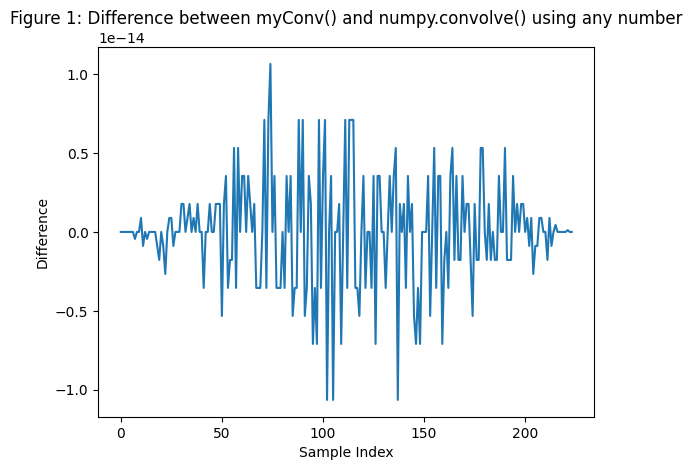

In [83]:
f = np.random.uniform(0, high=1, size=(75))
w = np.random.uniform(0, high=1, size=(150))

# let dt = 1 for both functions
v1 = myConv(f, w, 1)
v2 = np.convolve(f, w) * 1

plt.plot(v1 - v2)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Figure 1: Difference between myConv() and numpy.convolve() using any number')
plt.show()

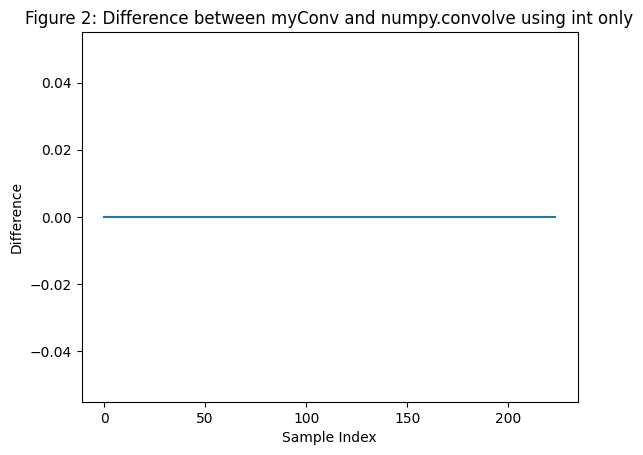

In [84]:
f = np.random.randint(99999, size=(75))
w = np.random.randint(99999, size=(150))

# let dt = 1 for both functions
v1 = myConv(f, w, 1)
v2 = np.convolve(f, w) * 1

plt.plot(v1 - v2)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Figure 2: Difference between myConv and numpy.convolve using int only')
plt.show()

From the result observed in Figure 1 and Figure 2, we can see that when both f and w are integers, the results for myConv and np.convolve are the same. However, when we use any random numbers that can also contain decimal points, we can observe some differences coming from the two different functions. The differences increase as the index approaches the center, and when the index approaches the max and min sample index, the differences approach 0.

### Solution for Q1.4

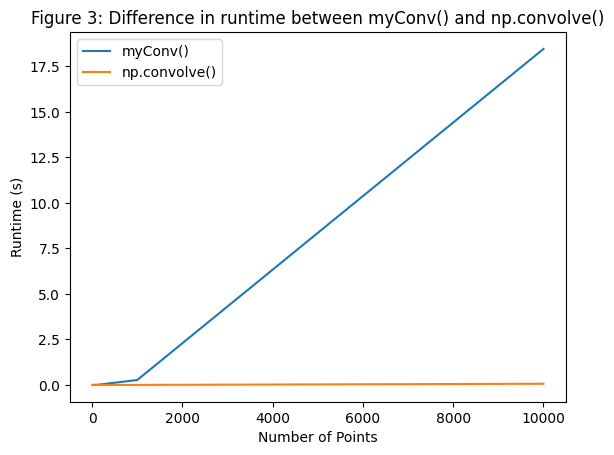

In [85]:
import time

test_N = [10, 100, 1000, 10000]
t_v1 = []
t_v2 = []

for t in test_N:
    f = np.random.randint(1, size=(t))
    w = np.random.randint(1, size=(t))

    t1 = time.time()
    v1 = myConv(f, w, 1)
    t2 = time.time()
    t_v1.append(t2 - t1)
    # print(t2-t1)

    t3 = time.time()
    v2 = np.convolve(f, w)
    t4 = time.time()
    t_v2.append(t4 - t3)
    # print(t2-t1)

plt.plot(test_N, t_v1, label="myConv()")
plt.plot(test_N, t_v2, label="np.convolve()")
plt.legend()

plt.xlabel('Number of Points')
plt.ylabel('Runtime (s)')
plt.title('Figure 3: Difference in runtime between myConv() and np.convolve()')
plt.show()

# Simple Physical System: RL Circuit Response (7 pts)

Consider a simple physical system consisting of a resistor (with resistance `R`) and an inductor (with inductance `L`) in series.  We apply an input voltage $a(t)$ across the pair in series, and measure the output
voltage $b(t)$ across the inductor alone. For this linear system,

 1. Show analytically that its step response (i.e., the $b(t)$ we obtain when the input voltage $a(t) = H(t)$,
    the Heaviside function) is given by

    $$ S(t) = e^{-Rt/L} H(t), $$

    and its impulse response (i.e., the output voltage $b(t)$ when $a(t) = \delta(t)$) is given by

    $$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t). $$

    _Hint_: Construct and solve the ODE relating the voltages under consideration. Consider the two $b(t)$ choices to derive $S(t)$ and $R(t)$. Formulas $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$ may help.
 2. Discretize the impulse response $R(t)$ function, realizing that $H(t)$ should be discretized as

    $$H = [0.5, 1, 1, \dots],$$

    and $\delta(t)$ should be discretized as

    $$D = [1/dt, 0, 0, \dots].$$

    Take advantage of your `myConv` function, or the NumPy built-in function `convolve`, and write
    your own Python function `V_out = RLresponse(R,L,V_in,dt)` to take an input series $V_{in}$ sampled
    at $\Delta = dt$, and calculate the output series $V_{out}$ sampled by the same $dt$. Please paste your
    Python function here (if you are not using a jupyter notebook). (Hint: here $\Delta$ may not be 1, so remember to build the multiplication of
    $\Delta$ into your convolution function.)
 3. Using $R = 1000 \Omega$, $L = 3 H$, and sampling period $dt = 0.25 \text{ ms}$, test your RL-response
    function with {$H_n$} series (discretized $H(t)$) as input, and plot the output time series (as circles) on
    top of the theoretical curve $S(t)$ given by part 1 (as a solid line). Repeat this for {$D_n$} (discretized
    $\delta(t)$) and $R(t)$. Make the time range of the plots 0 to at least 25 ms. Please list your Python
    code here (if you are not using a jupyter notebook).

References:
- https://www.allaboutcircuits.com/textbook/direct-current/chpt-15/inductors-and-calculus/
- https://lah.elearningontario.ca/CMS/public/exported_courses/SPH4C/exported/SPH4CU06/SPH4CU06/SPH4CU06A02/_content.html#:~:text=Kirchhoff's%20Voltage%20Law%20(KVL)%20states,in%20the%20circuit%20is%20equal.

### Solution for Q2.1

From the internet, we know that the relationship between the voltage and current of an inductor is described by

$$ V = L \frac{dI}{dt} $$

From Kirchhoff's Voltage Law we know that for any closed loop in a circuit, the sum of the potential differences acrooss all components is zero. From that we konw that 
 
 $$ a(t) = IR + b(t) $$

To calculate the step response, knowing that $  a(t) = H(t) $ and $ b(t) = L \frac{dI}{dt} $, we can replace both $a(t)$ and $b(t)$ from the first equation to get

$$ a(t) = IR + b(t) $$
$$ H(t) = IR + L \frac{dI}{dt} $$
$$ \frac{H(t)}{L} = \frac{IR}{L} + \frac{dI}{dt} $$

Using the Method of Integrating Factor to solve this ODE, we set the integrating factor to be $ e^{\frac{R}{L}t} $, then

$$ \frac{H(t)}{L}e^{\frac{R}{L}t} = \frac{R}{L}I e^{\frac{R}{L}t} + \frac{dI}{dt}e^{\frac{R}{L}t} $$
$$ \frac{d}{dt} (Ie^{\frac{R}{L}t}) = \frac{H(t)}{L}e^{\frac{R}{L}t}$$
$$ Ie^{\frac{R}{L}t} = \frac{1}{L}\int H(t) e^{\frac{R}{L}t}dt $$

Now let's use Integration by Parts on the RHS. For $ \int H(t) e^{\frac{R}{L}t}dt $, $ dv = e^{\frac{R}{L}t}$ , and $u = H(t)$.
From that, we can calcualte that $v=\frac{L}{R}e^{\frac{R}{L}t}$, and $ du = \delta (t) $.

$$ RHS = \frac{1}{L} \int H(t) e^{\frac{R}{L}t}dt = \frac{1}{L} \frac{L}{R}e^{\frac{R}{L}t}H(t) - \frac{1}{L} \frac{L}{R} \int e^{\frac{R}{L}t} \delta (t) dt  = \frac{1}{L} \frac{L}{R} H(t) (e^{\frac{R}{L}t} - 1) $$

Now substitute the RHS back to the original equation, we get

$$ Ie^{\frac{R}{L}t} = \frac{1}{L} \frac{L}{R} H(t) (e^{\frac{R}{L}t} - 1) $$
$$ I = \frac{1}{R} H(t) (1 - e^{-\frac{R}{L}t}) $$

Assuming the constant coming from the integration to be 0.

Since $ S(t) = b(t)$, then
$$ S(t) = L \frac{dI}{dt} $$
$$ S(t) = \frac{L}{R} \frac{d}{dt} H(t) (1 - e^{-\frac{R}{L}t}) $$
$$ S(t) = \frac{L}{R} \delta (t) (1 - e^{-\frac{R}{L}t}) + \frac{L}{R} H(t) (\frac{R}{L} e^{-\frac{R}{L}t}) $$
$$ S(t) = \frac{L}{R} \delta (t) (1 - e^{-\frac{R}{L}t}) + H(t) e^{-\frac{R}{L}t} $$

And when $ t=0 $, $\frac{L}{R} \delta (t) (1 - e^{-\frac{R}{L}t}) = 0$
Then we get $ S(t) = H(t) e^{-\frac{R}{L}t} $ for the step response as required.

To calculate the impulse response, we need to go back to $ a(t) = IR + b(t)$, but this time, we need to take $ a(t) = \delta (t)$.

$$ a(t) = IR + b(t)$$
$$ \delta (t) = IR + L \frac{dI}{dt} $$
$$ \frac {\delta (t)}{L} = \frac{IR}{L} + \frac{dI}{dt} $$

Using the Method of Integrating Factor again for this ODE, we set the integrating factor to be $ e^{\frac{R}{L}t} $, then

$$ \frac{1}{L} \delta (t) e^{\frac{R}{L}t}= \frac{IR}{L} e^{\frac{R}{L}t} + \frac{dI}{dt}e^{\frac{R}{L}t} $$
$$ I e^{\frac{R}{L}t} = \int \frac{1}{L} \delta (t) e^{\frac{R}{L}t} dt $$
$$ I e^{\frac{R}{L}t} = \frac{1}{L} \int \delta (t) e^{\frac{R}{L}t} dt $$

Since we are given that $ \delta (t) f(t) = \delta (t) f(0) $, then
$$ I e^{\frac{R}{L}t} =  \frac{1}{L} \int \delta (t) e^{\frac{R}{L}0} dt $$
$$ I e^{\frac{R}{L}t} =  \frac{1}{L} \int \delta (t) dt $$
$$ I = \frac{1}{L} H(t) e^{-\frac{R}{L}t} $$

For the impulse response:
$$ R(t) = L \frac{dI}{dt} $$
$$ R(t) = \frac{d}{dt} H(t) e^{-\frac{R}{L}t} $$
$$ R(t) = \delta (t) e^{-\frac{R}{L}t} - \frac{R}{L} H(t) e^{-\frac{R}{L}t} $$

And when $ t=0 $, $ R(t) = \delta (t) - \frac{R}{L} H(t) e^{-\frac{R}{L}t} $, which is also what we are trying to proof.

### Solution for Q2.2 & Q2.3

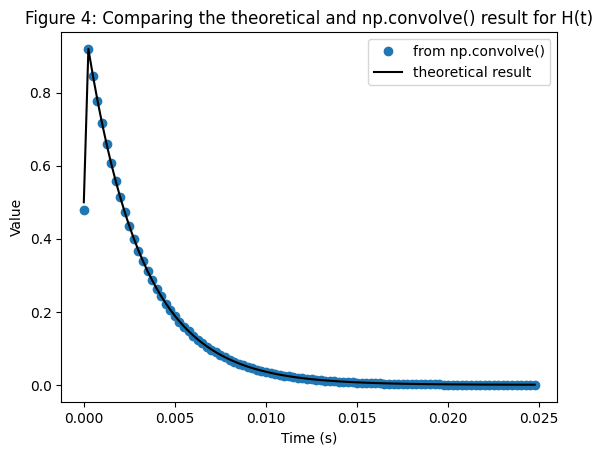

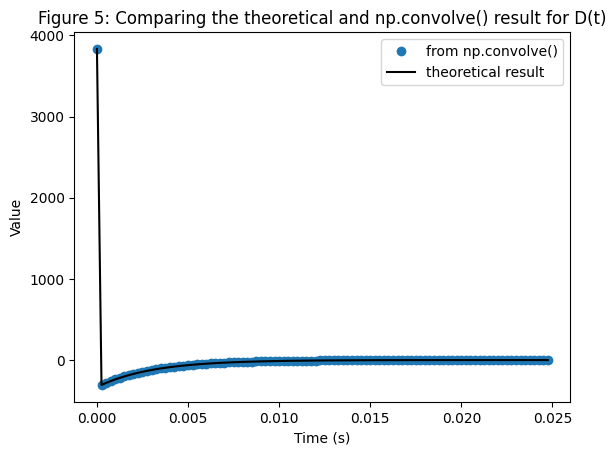

In [86]:
def RLresponse(R,L,V_in,dt):
    length = len(V_in)

    H = np.ones(length)
    H[0] = 0.5
    D = np.zeros(length)
    D[0] = 1/dt

    func_R = np.zeros(length)

    for i in range(length):
        func_R[i] = D[i] - R/L * np.exp(-R * i * dt / L) * H[i]

    return np.convolve(V_in, func_R, mode='full') * dt

R = 1000
L = 3
dt = 0.00025
time = np.arange(0, 0.025, dt)

H = np.ones(100)
H[0] = 0.5
D = np.zeros(100)
D[0] = 1/dt

H_original = np.ones(100)
D_original = np.ones(100)

for i in range(100):
    H_original[i] = np.exp(-R/L * i * dt) * H[i]
    D_original[i] = D[i] - R/L*np.exp(-R/L * i * dt) * H[i]

V_in = H
V_out = RLresponse(R, L, V_in, dt)
plt.plot(time, V_out[:100], 'o', label="from np.convolve()")
plt.plot(time, H_original, 'k', label="theoretical result")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Figure 4: Comparing the theoretical and np.convolve() result for H(t)')
plt.legend()
plt.show()
# print(V_out, len(V_out))

V_in = D
V_out = RLresponse(R, L, V_in, dt)
plt.plot(time, V_out[:100], 'o', label="from np.convolve()")
plt.plot(time, D_original, 'k', label="theoretical result")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Figure 5: Comparing the theoretical and np.convolve() result for D(t)')
plt.legend()
plt.show()

# Convolution of a thermal infrared Spectrum (8 pts)

The Tropospheric Emission Spectrometer (TES) is a Fourier transform spectrometer that was launched by NASA on the Aura spacecraft in July 2004. The instrument measures radiation from the atmosphere in the thermal infrared region of the spectrum. The file `TES_spectra.txt` contains TES measurements on 10 July 2010 from the 2B1 filter on TES. In this spectral region, vertical profiles of atmopsheric temprature and water vapour can be retrieved. (The file contains the spectrum as a function of wavenumbers $\tilde{\nu} = 1/\lambda$ in units of cm$^{-1}$). One way of simulating the spectrum that might be measured by a low-resolution version of TES is by convolving the TES high-resolution spectrum with the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$, where $\Delta$ is a measure of the spectral resolution.

1. Plot the TES spectrum as a function of wavenumber. 
2. Plot the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$ over the interval $\tilde{\nu}=[-3,3]$, with $\Delta \tilde{\nu} = 0.06$ cm$^{-1}$, for values of $\Delta = 1$ and $\Delta =3$.
3.	Use numpy's convolve function to convolve the high-resolution spectrum in the file `TES_Spectra.txt` separately with the two curves in Part 2 (i.e., for $\Delta = 1$ and $\Delta = 3$).
4.	For each of the two cases, plot the original and convolved time series over the wavenumber range $[700,750]$. Comment on the differences in the convolved time series between the two cases.
5. Consider convolving the spectrum with the following Gaussian: $g(\tilde{\nu}) = \frac{1}{\sqrt{\pi}L} e^{-(\tilde{\nu}/L)^2}.$

   Plot The Guassian for $L=0.5$ (over the interval $\tilde{\nu}=[-3,3]$) and the timeseries of the convolution of the TES spectrum with the Gaussian (over the range [700,750]). Comment on the differences between the this convolved time series and those from Part 4.

__Note__

* The spectrum in  `TES_Spectra.txt` is given as a text file with two columns: the first column contains the wavenumber of the measurement (in units of cm$^{-1}$) and the second column has the spectral signal (in Watts cm$^{-2}$ sr$^{-1}$/cm$^{-1}$).
* Use `mode='same'` when calling numpy convolve to truncate the convolution to the max of the supplied arrays (i.e. length of the high-resolution timeseries in our case). This is convenient, since we want to compare the convolution output to the original timeseries.  
* As a check for Parts 4 and 5, ensure that your convolved timeseries is aligned with (or "overlaps") the original timeseries.

### Solution for Q3.1

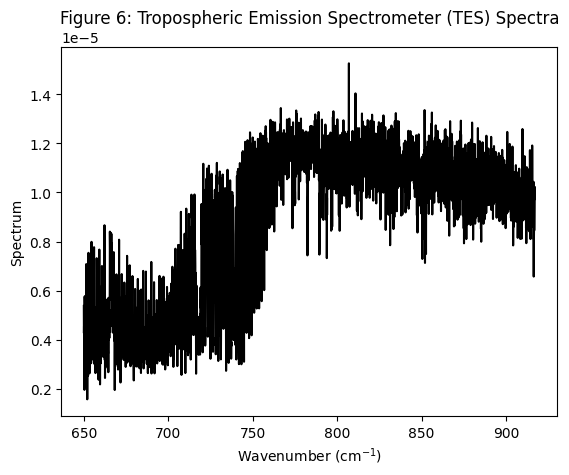

In [87]:
# read in the data
spectra_data = np.genfromtxt('TES_Spectra.txt')
wave_number = spectra_data[:,0]
spectra = spectra_data[:,1]

# plot the TES spectrum
plt.plot(wave_number, spectra, color='k')
plt.title('Figure 6: Tropospheric Emission Spectrometer (TES) Spectra')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Spectrum')
plt.show()

### Solution for Q3.2

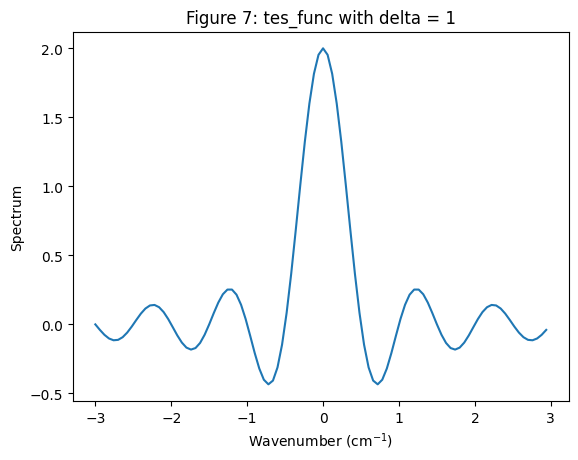

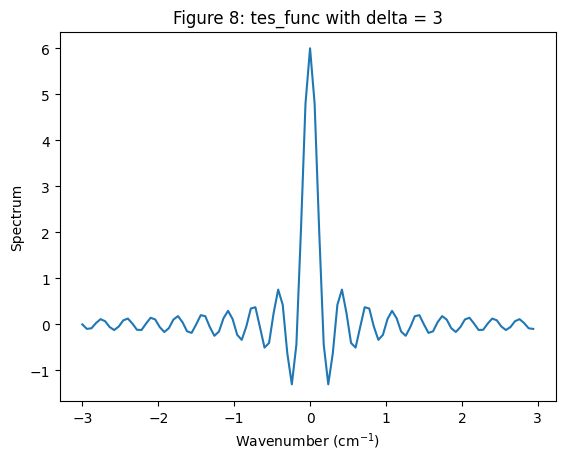

In [88]:
def tes_func(wave_number, delta):
    return 2 * delta * np.sin(2 * np.pi * wave_number * delta) / (2 * np.pi * wave_number * delta)

delta_1 = 1
delta_3 = 3
wave_number_interval = np.arange(-3, 3, 0.06)
dt = 0.06

delta_func_1 = tes_func(wave_number_interval, delta_1)
delta_func_3 = tes_func(wave_number_interval, delta_3)

# plot 1
plt.plot(wave_number_interval, delta_func_1)
plt.title('Figure 7: tes_func with delta = 1')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Spectrum')
plt.show()

# plot 2
plt.plot(wave_number_interval, delta_func_3)
plt.title('Figure 8: tes_func with delta = 3')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Spectrum')
plt.show()

### Solution for Q3.3 & Q3.4

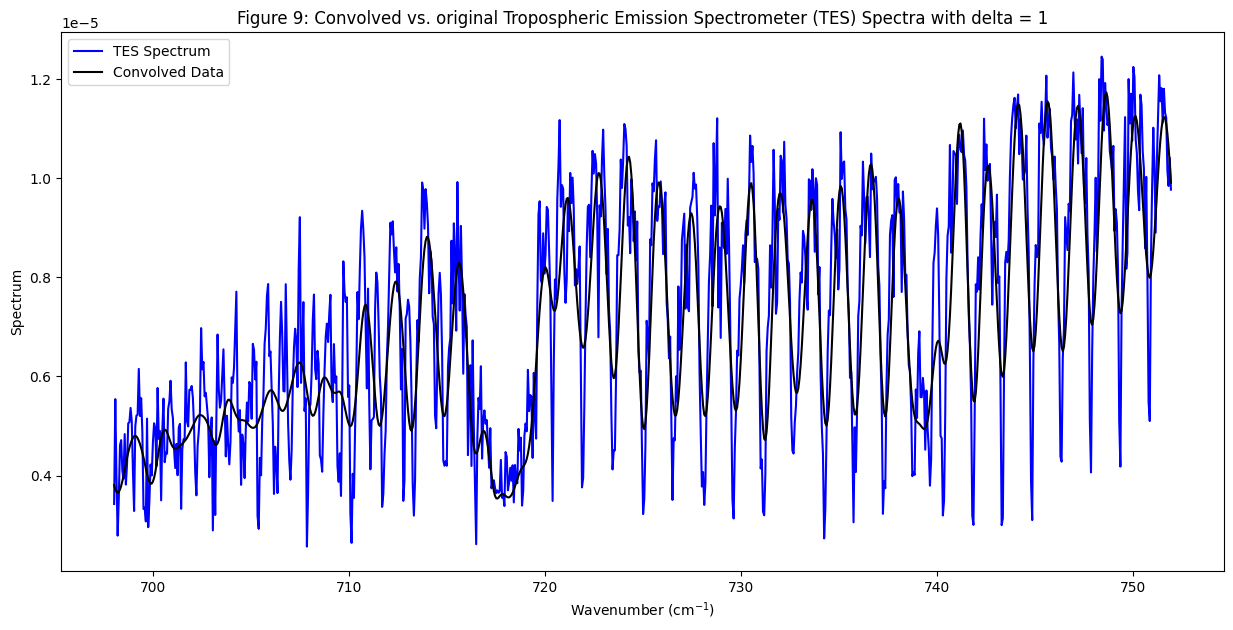

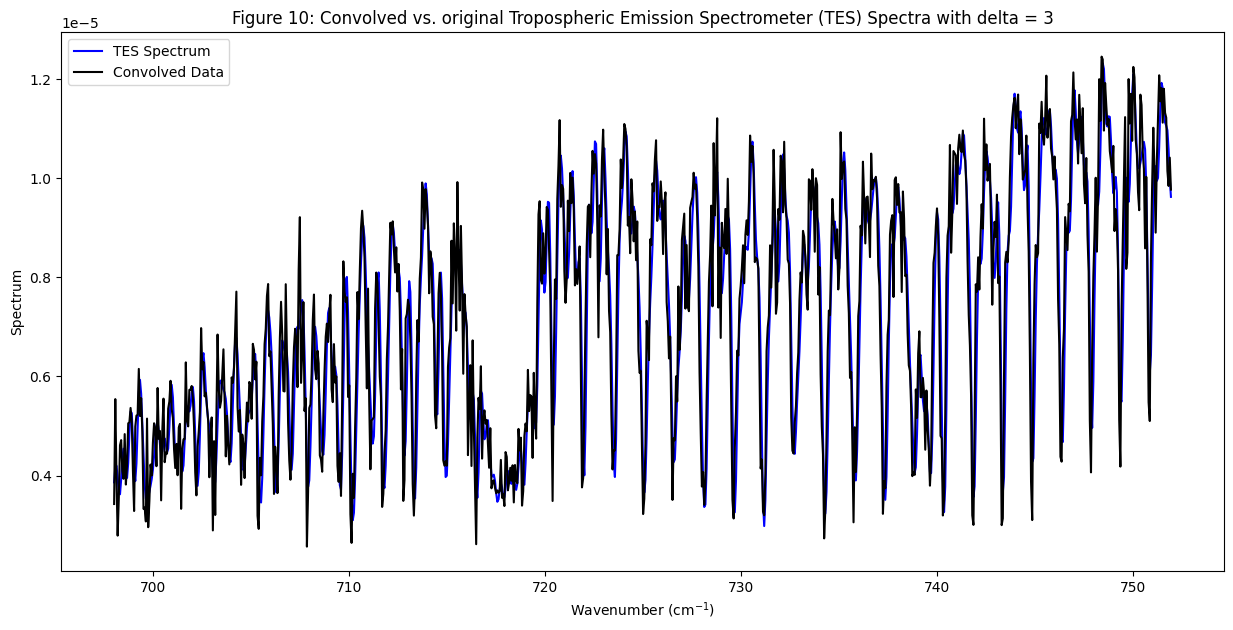

In [89]:
dt = 0.06

plt.figure(figsize=(15,7))
conv1 = np.convolve(spectra, delta_func_1, mode='same', ) * dt
plt.plot(wave_number[800:1700], spectra[800:1700],'b-', label='TES Spectrum')
plt.plot(wave_number[800:1700], conv1[800:1700],'k-', label='Convolved Data')

plt.title('Figure 9: Convolved vs. original Tropospheric Emission Spectrometer (TES) Spectra with delta = 1')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Spectrum')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
conv2 = np.convolve(spectra, delta_func_3, mode='same') * dt
plt.plot(wave_number[800:1700],conv2[800:1700], 'b-', label='TES Spectrum',)
plt.plot(wave_number[800:1700], spectra[800:1700],'k-', label='Convolved Data')

plt.title('Figure 10: Convolved vs. original Tropospheric Emission Spectrometer (TES) Spectra with delta = 3')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Spectrum')
plt.legend()
plt.show()

### Solution for Q3.5

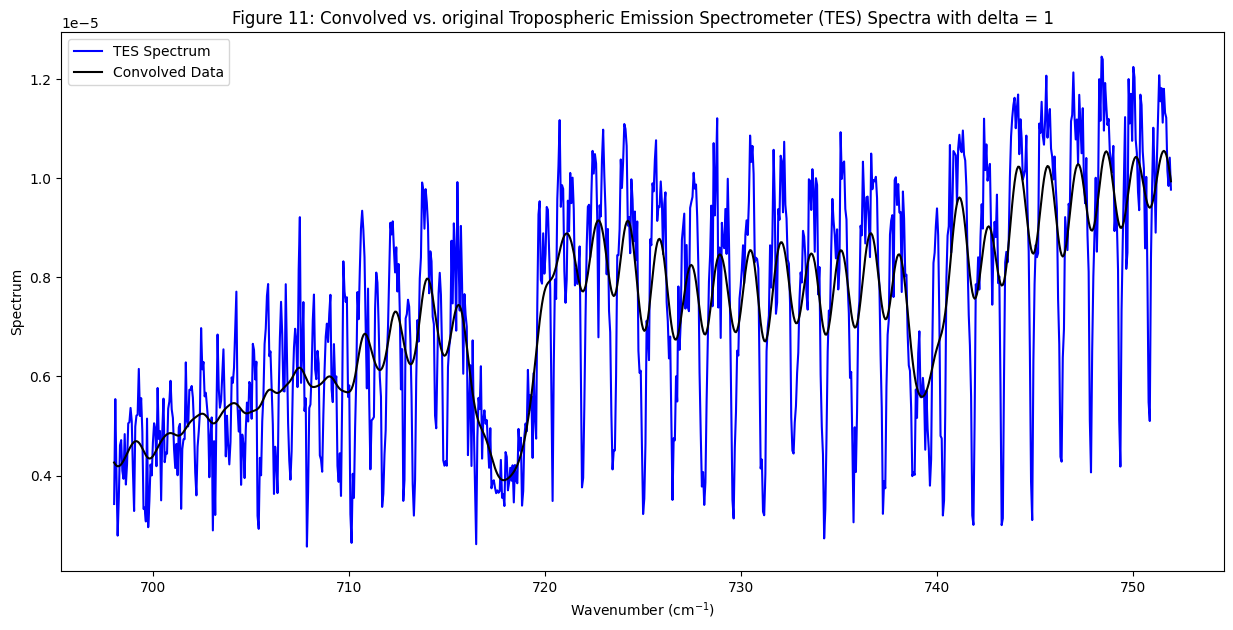

In [90]:
dt = 0.06
L = 0.5

guassian_func = (1/(np.sqrt(np.pi)*L)) * np.exp(-((wave_number_interval/L)**2))

plt.figure(figsize=(15,7))
conv1 = np.convolve(spectra, guassian_func, mode='same') * dt
plt.plot(wave_number[800:1700], spectra[800:1700],'b-', label='TES Spectrum')
plt.plot(wave_number[800:1700], conv1[800:1700],'k-', label='Convolved Data')

plt.title('Figure 11: Convolved vs. original Tropospheric Emission Spectrometer (TES) Spectra with delta = 1')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Spectrum')
plt.legend()
plt.show()

Comparing the results from Q3.4 and Q3.5, we can see that the convolved time series from Q3.4 which uses a sine function fits the data much better than the one from Q3.5 which uses a gaussian function. Out of the two from Q3.4, the one with a higher delta of 3 fits better than the one with a delta of 1. The one from Q3.4 with a delta of 1 is still a better fit than the one from Q3.5 in general because it mimics the original data's ups and downs. Whereas the one from Q3.5 is too smoothed out, you can see the amplitude of the convolved time series is much smaller than the original data.

So in summary, if you want a convolved time series that best describes the trends of the original data, use the sine function from Q3.4, and the higher the delta, the better the fit. But if you want a smoothed-out version of the original data that also keeps most of the ups and downs, then the Gaussian function used in Q3.5 is a good option.
